In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


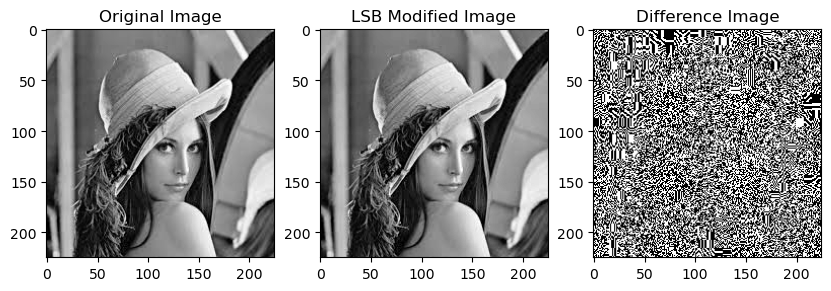

In [5]:
def lsb_modification(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Set LSB of each pixel to 0
    modified_img = img & 0b11111110  # Zero out the least significant bit
    
    # Compute the difference image
    diff_img = img - modified_img
    
    # Display images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("LSB Modified Image")
    plt.imshow(modified_img, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Difference Image")
    plt.imshow(diff_img, cmap='gray')
    plt.show()
    
    # Save modified image
    cv2.imwrite("lsb_modified.png", modified_img)
image_path = 'images.jpg'
lsb_modification(image_path)

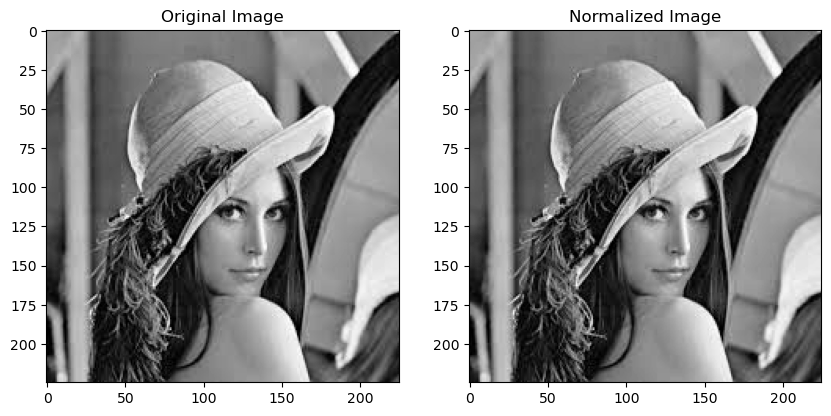

In [7]:
def normalize_image(image_path, R=128):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_float = img.astype(np.float32)
    
    # Normalize using given formula
    min_val, max_val = np.min(img_float), np.max(img_float)
    norm_img = np.round((img_float - min_val) / (max_val - min_val) * R).astype(np.uint8)
    
    # Display images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Normalized Image")
    plt.imshow(norm_img, cmap='gray')
    plt.show()
    
    # Save normalized image
    cv2.imwrite("normalized.png", norm_img)
image_path = 'images.jpg'
normalize_image(image_path)

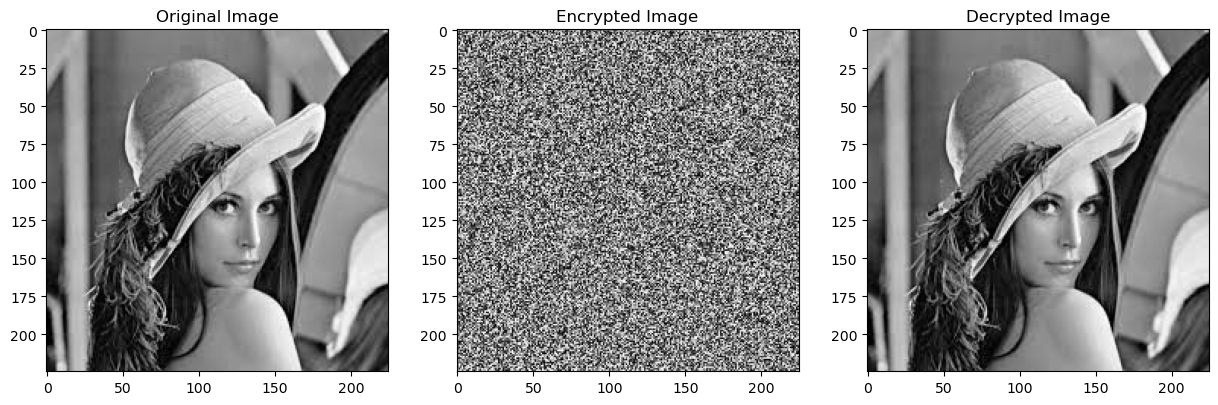

Decryption successful! The decrypted image matches the original.


In [9]:
def encrypt_decrypt_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Generate random key matrix
    key = np.random.randint(0, 256, img.shape, dtype=np.uint8)
    
    # Encrypt image
    encrypted_img = (img + key) % 256
    
    # Decrypt image
    decrypted_img = (encrypted_img - key) % 256
    
    # Display images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("Encrypted Image")
    plt.imshow(encrypted_img, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Decrypted Image")
    plt.imshow(decrypted_img, cmap='gray')
    plt.show()
    
    # Save images
    cv2.imwrite("encrypted.png", encrypted_img)
    cv2.imwrite("decrypted.png", decrypted_img)
    
    # Verify decryption correctness
    if np.array_equal(img, decrypted_img):
        print("Decryption successful! The decrypted image matches the original.")
    else:
        print("Decryption failed! There are differences between the original and decrypted image.")

# Example usage (replace 'image.png' with your actual image path)
image_path = 'images.jpg'
encrypt_decrypt_image(image_path)